# Timelapse by hand
We will practise how to analyse timelapse data by hand inversion using both the ERTManager and the command line.
Hypothetical scenario is a tracer injection into a shallow aquifer.

First we do some modelling:
1. Generate a two-layer model 
1. do a forward calculation with gradient data - baseline data0.dat
2. Introduce a conductive body and compute data1.dat
3. Compute the ratio between the two simulations and plot it using `pb.plotERTData(data, vals=)`
4. Move the block in the model or enlarge it, create new data `data2.data` and have a look at the ratio to the baseline and the preceding step.

In [2]:
# first all the imports
import numpy as np
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert

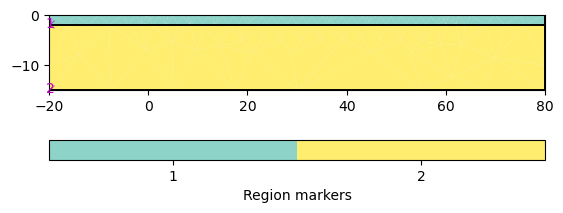

In [3]:
# baseline
world = mt.createWorld(start=[-20, 0], end=[80, -15], layers=[-2])
ex = np.arange(60.1)
# The electrodes are added to a mesh along with a refinement point
for xi in ex:
    world.createNode([xi, 0])
    world.createNode([xi, -0.2])
pg.show(world);

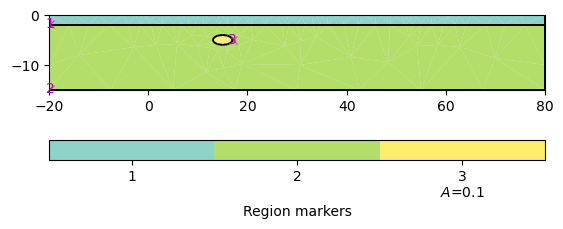

In [4]:
# First time step
blop = mt.createCircle(pos=[15, -5], radius=[2, 1], marker=3, area=0.1)
geo1 = mt.mergePLC([world, blop])
pg.show(geo1);

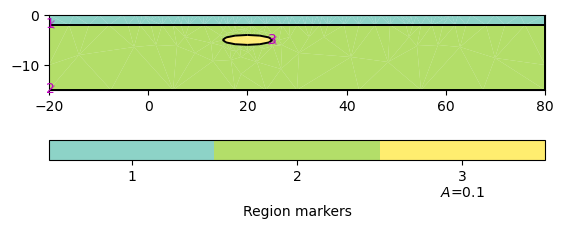

In [5]:
blop2 = mt.createCircle(pos=[20, -5], radius=[5, 1], marker=3, area=0.1)
geo2 = mt.mergePLC([world, blop2])
pg.show(geo2);

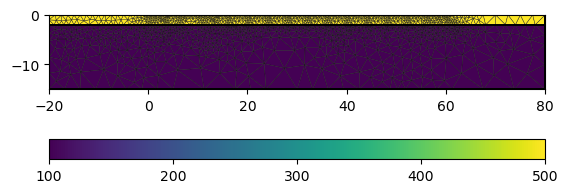

In [6]:
rhobase = [[1, 500], [2, 100]]
mesh = mt.createMesh(world, quality=34.4)
pg.show(mesh, rhobase, showMesh=True);

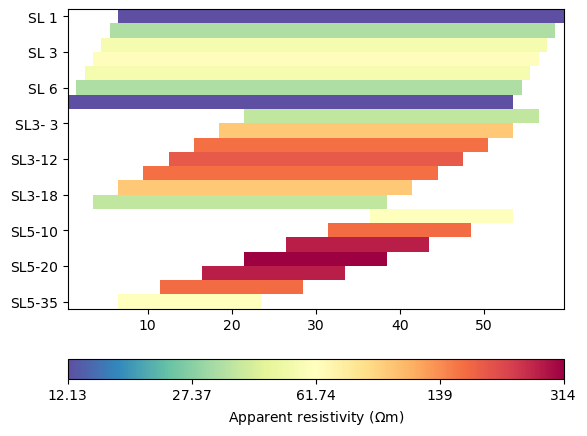

In [7]:
scheme = ert.createData(elecs=ex, schemeName='gr')
scheme['k'] = ert.geometricFactors(scheme)
ert.show(scheme, 'k')
error = 0.02

Data error estimate (min:max)  0.020002599767966558 : 0.020301079555543403


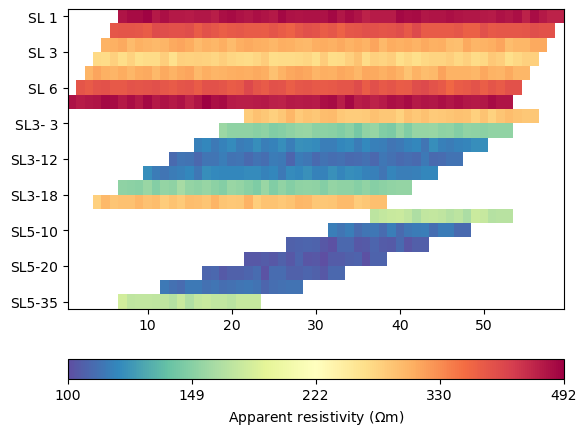

In [8]:
data = ert.simulate(mesh, scheme=scheme, res=rhobase, noiseLevel=error)
ert.show(data);

Data error estimate (min:max)  0.020002603065291606 : 0.020321826174200728


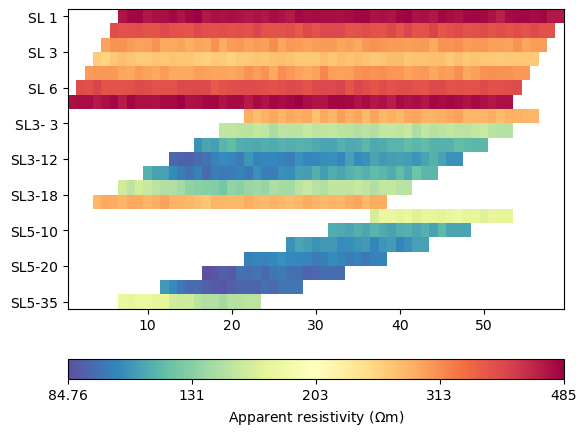

In [9]:
mesh = mt.createMesh(geo1, quality=34.4)
rhotime = rhobase + [[3, 5]]
data1 = ert.simulate(mesh, scheme=scheme, res=rhotime, noiseLevel=error)
ert.show(data1);

Data error estimate (min:max)  0.0200026031543025 : 0.020576214478256964


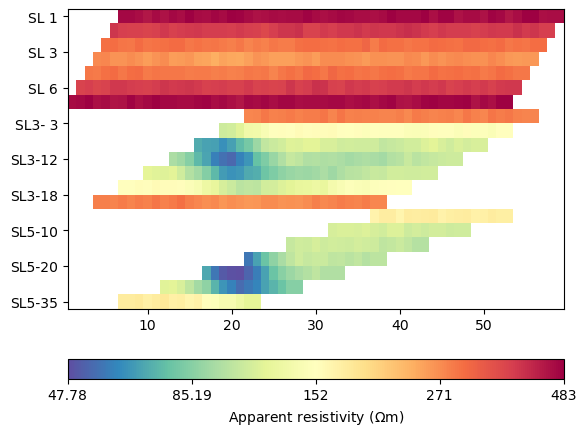

In [10]:
mesh = mt.createMesh(geo2, quality=34.4)
data2 = ert.simulate(mesh, scheme=scheme, res=rhotime, noiseLevel=error)
ert.show(data2);

Now we do some inversion using the ERT manager.

04/06/23 - 17:28:56 - pyGIMLi - INFO - Found 2 regions.
04/06/23 - 17:28:56 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/06/23 - 17:28:56 - pyGIMLi - INFO - Found 2 regions.
04/06/23 - 17:28:56 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/06/23 - 17:28:56 - pyGIMLi - INFO - Creating forward mesh from region infos.
04/06/23 - 17:28:56 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
04/06/23 - 17:28:56 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2761 Cells: 5200 Boundaries: 4060
04/06/23 - 17:28:56 - pyGIMLi - INFO - Use median(data values)=281.6388525075417
04/06/23 - 17:28:56 - pyGIMLi - INFO - Created startmodel from forward operator: 1018 [281.6388525075417,...,281.6388525075417]
04/06/23 - 17:28:56 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000231ABAF8860>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000231AED0A310>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000231ABAF8900>
min/max (data): 100/492
min/max (error): 2%/2.03%
min/max (start model): 282/282
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 7.05 (dPhi = 98.96%) lam: 20
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 1.71 (dPhi = 65.03%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.0 (dPhi = 23.74%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 0.95 (dPhi = 1.68%) lam: 20.0


#############################################################

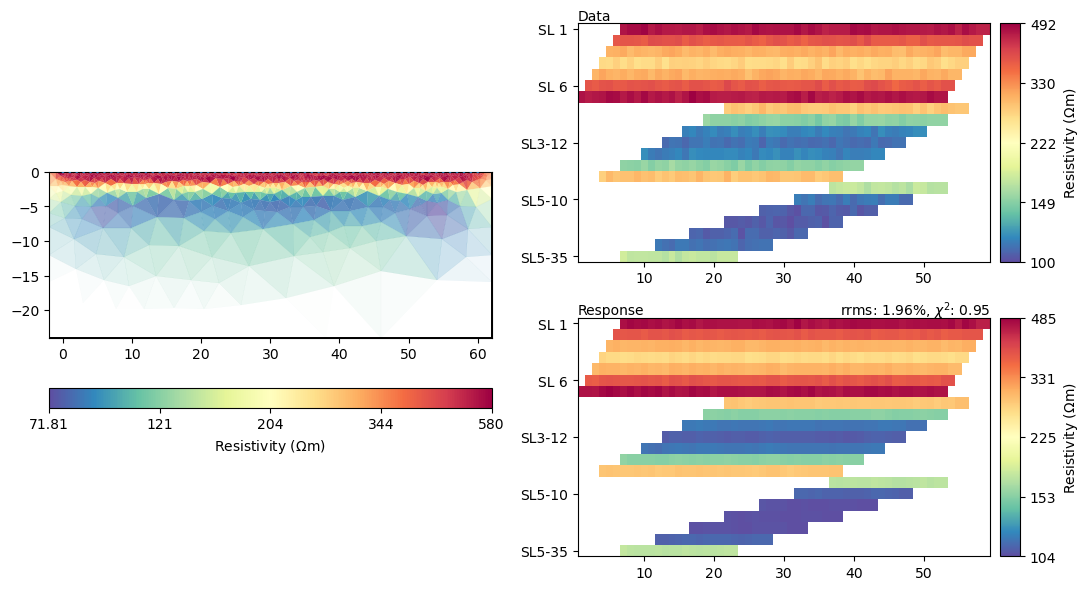

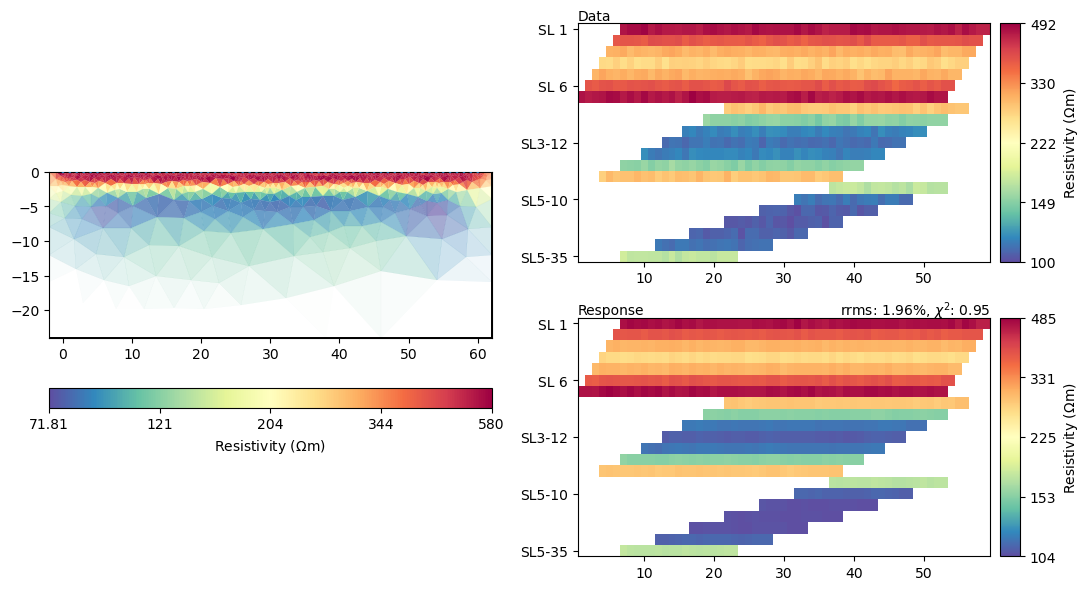

In [11]:
mgr = ert.Manager()
mgr.invert(data, verbose=True)
mgr.showResultAndFit()

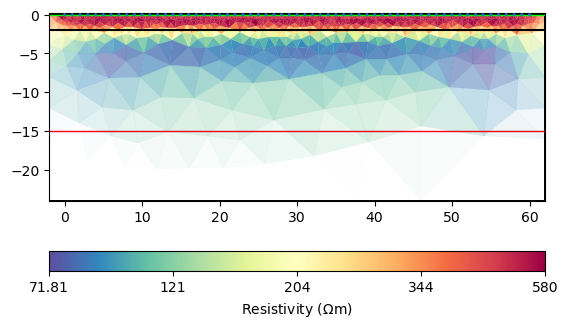

In [12]:
ax, cb = mgr.showResult()
pg.viewer.mpl.drawPLC(ax, world, fillRegion=False, fitView=False);

In [13]:
model0 = mgr.model.copy()

In [14]:
mgr.invert(data1, lam=25, verbose=True)

04/06/23 - 17:29:03 - pyGIMLi - INFO - Use median(data values)=279.4519617759548
04/06/23 - 17:29:03 - pyGIMLi - INFO - Created startmodel from forward operator: 1018 [279.4519617759548,...,279.4519617759548]
04/06/23 - 17:29:03 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000231ABAF8860>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000231AED0A310>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000231ABAF8900>
min/max (data): 84.76/485
min/max (error): 2%/2.03%
min/max (start model): 279/279
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 7.38 (dPhi = 98.99%) lam: 25
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 1.54 (dPhi = 66.19%) lam: 25.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.02 (dPhi = 16.36%) lam: 25.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 0.98 (dPhi = 0.89%) lam: 25.0


##########################################################

1018 [558.1823816305076,...,117.80625841970219]

Mostly we are interested in the difference (change) between the models. As we mostly use the logarithm of resistivity as model ($m=\rho$), the difference of the models is essentially the resistivity ratio, again looked at with a logarithmic eye:
$$\Delta m = m^2 - m^1 = \log\rho^2 - \log\rho^1 = \log\frac{\rho^2}{\rho^1}$$
We therefore compute the ratio and show it logarithmically with 1 in the middle:

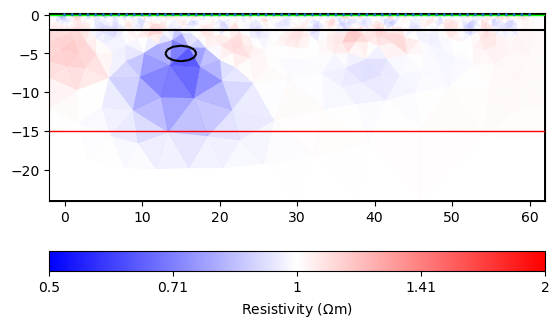

In [15]:
ratio = mgr.model / model0
ax, cb = mgr.showResult(ratio, cMin=0.5, cMax=2, cMap="bwr")
pg.viewer.mpl.drawPLC(ax, geo1, fillRegion=False, fitView=False);

Inversion results show artifacts and taking the difference. We mighty use the first result as starting model:

04/06/23 - 17:29:08 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000231ABAF8860>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000231AED0A310>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000231ABAF8900>
min/max (data): 84.76/485
min/max (error): 2%/2.03%
min/max (start model): 71.81/580
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1.03 (dPhi = 75.01%) lam: 25
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 0.99 (dPhi = 1.69%) lam: 25.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.99)                   #
################################################################################


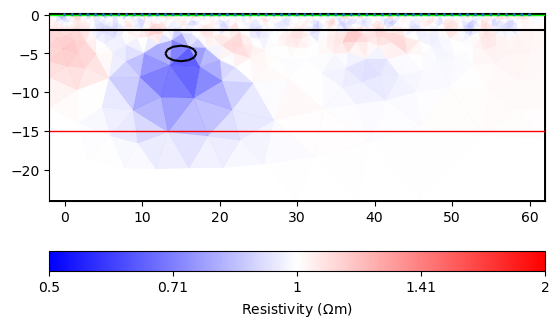

In [16]:
mgr.invert(data1, lam=25, startModel=model0, verbose=True)
ratio = mgr.model / model0
ax, cb = mgr.showResult(ratio, cMin=0.5, cMax=2, cMap="bwr")
pg.viewer.mpl.drawPLC(ax, geo1, fillRegion=False, fitView=False);

However, this does almost not show any change. As the next step, we use is also as a reference so that instead of the model roughness $C m$, the difference of the models is constrained
$$ \Phi_m = \|C (m^2 - m^1) \|_2^2 = \|C \log\frac{\rho^2}{\rho^1} \|_2^2 \rightarrow\min $$
As this vector is much smaller, we can use a higher regularization strength:

04/06/23 - 17:29:11 - pyGIMLi - INFO - Starting inversion.
04/06/23 - 17:29:11 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000231ABAF8860>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000231AED0A310>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000231ABAF8900>
min/max (data): 84.76/485
min/max (error): 2%/2.03%
min/max (start model): 71.81/580
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1.05 (dPhi = 85.69%) lam: 120
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 1.01 (dPhi = 3.63%) lam: 120.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.0 (dPhi = 0.08%) lam: 120.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 1.0 (dPhi = 0.0%) lam: 120.0
###########################################################

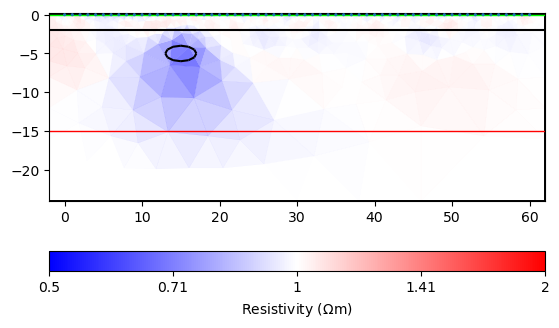

In [17]:
mgr.invert(data1, lam=120, startModel=model0, isReference=True, verbose=True)
ratio = mgr.model / model0
ax, cb = mgr.showResult(ratio, cMin=0.5, cMax=2, cMap="bwr")
pg.viewer.mpl.drawPLC(ax, geo1, fillRegion=False, fitView=False);

and obtain a result with much less artifacts. Again, we store a copy.

In [18]:
model1 = mgr.model.copy()


We now do the same for the second time step:

04/06/23 - 17:29:16 - pyGIMLi - INFO - Starting inversion.
04/06/23 - 17:29:16 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000231ABAF8860>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000231AED0A310>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000231ABAF8900>
min/max (data): 47.78/483
min/max (error): 2%/2.06%
min/max (start model): 71.81/580
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1.92 (dPhi = 95.38%) lam: 70
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 1.17 (dPhi = 30.67%) lam: 70.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.1 (dPhi = 1.83%) lam: 70.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 1.09 (dPhi = 0.19%) lam: 70.0
############################################################

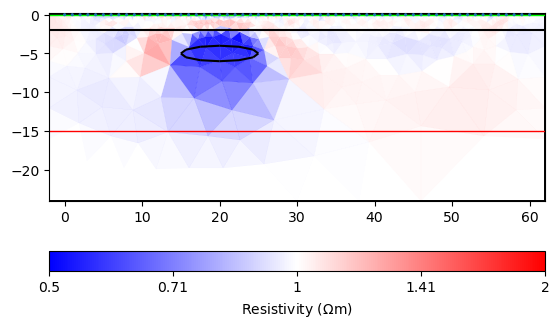

In [19]:
model2 = mgr.invert(data2, lam=70, startModel=model0, isReference=True, verbose=True)
ratio = model2 / model0
ax, cb = mgr.showResult(ratio, cMin=0.5, cMax=2, cMap="bwr")
pg.viewer.mpl.drawPLC(ax, geo2, fillRegion=False, fitView=False);

We could, of course, also take the second model as a reference.

04/06/23 - 17:29:22 - pyGIMLi - INFO - Starting inversion.
04/06/23 - 17:29:22 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000231ABAF8860>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000231AED0A310>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000231ABAF8900>
min/max (data): 47.78/483
min/max (error): 2%/2.06%
min/max (start model): 49.27/586
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1.73 (dPhi = 92.97%) lam: 70
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 1.17 (dPhi = 24.46%) lam: 70.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.12 (dPhi = 1.2%) lam: 70.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 1.11 (dPhi = 0.13%) lam: 70.0
############################################################

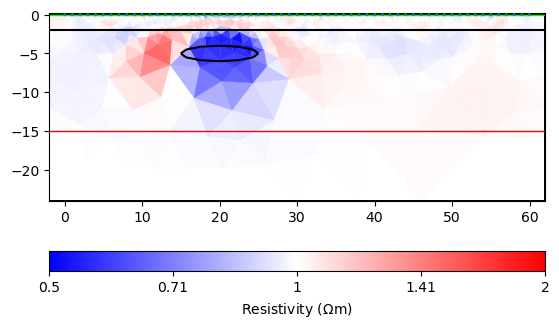

In [20]:
model2 = mgr.invert(data2, lam=70, startModel=model1, isReference=True, verbose=True)
ratio = model2 / model1
ax, cb = mgr.showResult(ratio, cMin=0.5, cMax=2, cMap="bwr")
pg.viewer.mpl.drawPLC(ax, geo2, fillRegion=False, fitView=False);

and see both the decrease of the second anomaly as well as the increase of the first one back to background.

## Full timelapse inversion

Instead of inverting single timesteps (frames) step by step, we want to invert all data simultaneously with constraints both in the individual frame and along frames.

In [41]:
from pygimli.frameworks import MultiFrameModelling

fop = MultiFrameModelling(ert.ERTModelling)
DATA = [data, data1, data2]
fop.setData(DATA)
fop.setMesh(mgr.mesh)
print(fop.parameterCount)

04/06/23 - 17:34:41 - pyGIMLi - INFO - Found 2 regions.
04/06/23 - 17:34:41 - pyGIMLi - INFO - Region with smallest marker (1) set to background
04/06/23 - 17:34:41 - pyGIMLi - WARNING - Parameter count is 0


0


The data vector comprises all data vector and the error vector alike.

In [33]:
dataVec = np.concatenate([data["rhoa"] for data in DATA])
errorVec = np.concatenate([data["err"] for data in DATA])
startModel = fop.createStartModel(dataVec)
# fop.setStartModel(startModel)  # needed if fop.createStartModel not implem.

In [34]:
models = np.reshape(startModel, (len(DATA), -1))
print(models.shape, models[0].shape)

(3, 0) (0,)


In [39]:
bla = ert.ERTModelling()
bla.setData(data)
bla.setMesh(mgr.mesh)
blu = bla.response(models[0])
print(blu)

04/06/23 - 17:33:55 - pyGIMLi - INFO - Found 2 regions.
04/06/23 - 17:33:55 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/06/23 - 17:33:55 - pyGIMLi - INFO - Creating forward mesh from region infos.
04/06/23 - 17:33:55 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
04/06/23 - 17:33:55 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2761 Cells: 5200 Boundaries: 4060


RuntimeError: ./core/src/vector.h:1501		T GIMLI::min(const Vector<ValueType2>&) [with T = double]  array size is zero.

In [31]:
# for f in fop.fops:
#     f.setMeshPost(mesh)

In [38]:
fop0 = fop.fops[0]
fop0.response(models[0])

04/06/23 - 17:33:33 - pyGIMLi - INFO - Creating forward mesh from region infos.


RuntimeError: RegionManager knows no mesh.

In [36]:
resp = fop.response(startModel)
print(resp)

04/06/23 - 17:32:52 - pyGIMLi - INFO - Creating forward mesh from region infos.


RuntimeError: RegionManager knows no mesh.

In [ ]:
inv = pg.Inversion(fop=fop, verbose=True)
fop.createConstraints()
# inv.setRegularization(C=fop.C)  # here we could also do other things?
# inv.startModel = 100
model = inv.run(dataVec, errorVec, maxIter=10, startModel=startModel)


04/06/23 - 16:54:11 - pyGIMLi - WARNING - Parameter count is 0
04/06/23 - 16:54:11 - pyGIMLi - WARNING - Parameter count is 0
04/06/23 - 16:54:11 - pyGIMLi - ERROR - <class 'pygimli.frameworks.inversion.Inversion'>.convertStartModel(c:\Guenther.T\src\gimli\gimli\pygimli\frameworks\inversion.py:224)
Starting model size invalid 3054 != 0.
04/06/23 - 16:54:11 - pyGIMLi - INFO - Created startmodel from forward operator: 3054 [280.2211004867538,...,280.2211004867538]
04/06/23 - 16:54:11 - pyGIMLi - INFO - Starting inversion.
04/06/23 - 16:54:11 - pyGIMLi - INFO - Creating forward mesh from region infos.


fop: <pygimli.frameworks.timelapse.MultiFrameModelling object at 0x0000011AAECF69F0>
Data transformation: <pgcore._pygimli_.RTrans object at 0x0000011AAEBC7B80>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000011AAECF6AE0>
min/max (data): 47.8/491
min/max (error): 2%/2.06%
min/max (start model): 280/280
--------------------------------------------------------------------------------


RuntimeError: RegionManager knows no mesh.